In [ ]:
library(TCGAbiolinks)

In [ ]:
#sessionInfo()

In [1]:
suppressWarnings(library(BayesPrism))
library(tidyverse)
library(tidyverse)
library(ggbeeswarm)
library(ggplot2)
library(reshape2)
library(SingleCellExperiment)

Loading required package: snowfall

Loading required package: snow

Loading required package: NMF

Loading required package: registry

Loading required package: rngtools

Loading required package: cluster

NMF - BioConductor layer [OK] | Shared memory capabilities [NO: bigmemory] | Cores 2/2

  To enable shared memory capabilities, try: install.extras('
NMF
')

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine()    masks Biobase::combine(), BiocGenerics::combine()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
✖ ggplot2::Position() masks Bioc

In [2]:
load('/lustre/scratch126/cellgen/team205/rl20/Gut/BayesPrism_out/GSE111889_fine_grained_annot_disease_only_new_sc_ref.rdata')

In [3]:
theta <- get.fraction(bp=bp.res,
            which.theta="final",
            state.or.type="type")

head(theta)

,Trm_Th17,Trm/em_CD8,Tfh_naive,B_plasma_IgA1,TA,Enterocyte,ILC3,Treg_IL10,Goblet_progenitor,Monocyte,⋯,Glial_2,Neuroblast,Macrophage_LYVE1,DC_langerhans,Glial_1,Oesophagus_fibroblast,Immune_recruiting_pericyte,Rectum_fibroblast,EC_cycling,Erythrocytes
CSM5FZ1G,3.287539e-04,2.607143e-03,4.043192e-06,1.088589e-06,0.115002791,1.173454e-06,1.702651e-06,4.836712e-05,7.282225e-03,3.068778e-06,⋯,7.089595e-06,1.168124e-06,0.022863784,2.657288e-06,1.525938e-03,1.341023e-03,3.120300e-06,1.820309e-03,2.414444e-06,1.259404e-03
CSM5FZ1F,2.588207e-06,2.907866e-06,4.976976e-07,9.917840e-07,0.155967426,6.051681e-01,1.398136e-06,1.573325e-06,1.852580e-05,9.496578e-03,⋯,1.373276e-05,9.493208e-07,0.009546485,1.583926e-06,1.025637e-05,6.120680e-05,1.849142e-06,3.262709e-07,1.591990e-06,2.063501e-02
CSM5FZ1I,5.718938e-04,9.702840e-03,2.976970e-06,3.855810e-06,0.082204558,9.907098e-07,9.871597e-06,7.854571e-06,3.582002e-03,2.119816e-06,⋯,3.835573e-04,2.289931e-06,0.036179578,1.679265e-06,2.527802e-03,3.059258e-03,3.080276e-05,3.946477e-03,3.674127e-06,2.413328e-04
CSM5FZ1H,8.101086e-06,1.578352e-03,2.956980e-06,1.196422e-06,0.183516055,7.130945e-07,3.093092e-06,1.341906e-06,8.460672e-03,8.540433e-06,⋯,2.462029e-06,5.036392e-06,0.012183825,1.330969e-06,6.568065e-04,6.686127e-04,1.071161e-06,1.100590e-03,8.918356e-06,2.019149e-04
CSM5FZ1J,6.837522e-06,2.066901e-06,4.127411e-06,1.618799e-06,0.001304348,6.961436e-01,2.943285e-06,1.461176e-06,4.610164e-06,7.269845e-07,⋯,1.316694e-06,1.419401e-04,0.023296418,7.320977e-05,3.031198e-04,1.804106e-06,5.025896e-06,2.970727e-04,1.467928e-06,6.317101e-07
CSM5FZ1K,8.078794e-07,4.803114e-07,1.140928e-06,2.079182e-06,0.005098397,1.101675e-06,1.702979e-06,5.041804e-07,1.252115e-06,5.040904e-07,⋯,9.430601e-07,1.753706e-03,0.005201450,1.424650e-06,2.876227e-03,1.627605e-06,7.020860e-06,9.755138e-06,1.489479e-04,5.860781e-07


In [4]:
Corr <- cor(theta)
Corr %>% head

,Trm_Th17,Trm/em_CD8,Tfh_naive,B_plasma_IgA1,TA,Enterocyte,ILC3,Treg_IL10,Goblet_progenitor,Monocyte,⋯,Glial_2,Neuroblast,Macrophage_LYVE1,DC_langerhans,Glial_1,Oesophagus_fibroblast,Immune_recruiting_pericyte,Rectum_fibroblast,EC_cycling,Erythrocytes
Trm_Th17,1.000000000,0.48428767,0.008318456,-0.145612948,0.34346158,0.01890408,-0.126332414,0.28502605,0.02258650,0.10639478,⋯,0.24593162,-0.3041097,0.28241942,-0.03304122,0.002994513,0.155096778,-0.11429385,0.18825684,-0.16725657,0.06087603
Trm/em_CD8,0.484287672,1.00000000,-0.030968582,-0.150113877,0.26744913,-0.16918239,-0.090263220,0.49522126,0.03915985,0.37285208,⋯,0.29527414,-0.3156535,0.24798568,-0.14888905,-0.039162964,0.182529860,-0.10702915,0.16277354,-0.18164427,0.19999760
Tfh_naive,0.008318456,-0.03096858,1.000000000,0.000210511,-0.10400948,0.10120621,0.023325793,-0.02490591,-0.05440082,0.08046907,⋯,-0.03173084,-0.1042778,0.05234308,0.15517050,-0.016945362,-0.001355023,-0.02272405,0.04542838,-0.04122233,0.11725787
B_plasma_IgA1,-0.145612948,-0.15011388,0.000210511,1.000000000,-0.07602408,-0.20712567,0.245298639,-0.09681230,-0.05439588,-0.05788117,⋯,-0.02145266,0.4414142,0.19654423,0.04308316,0.309564585,-0.071497167,0.40533351,-0.09804016,0.10749875,-0.05747553
TA,0.343461576,0.26744913,-0.104009478,-0.076024082,1.00000000,-0.33249727,-0.001968193,0.23447735,0.18214232,-0.01998923,⋯,0.12703167,-0.3239096,-0.05074890,-0.21095751,0.146559690,0.161625972,0.10768249,0.13124101,-0.04071268,0.02926147
Enterocyte,0.018904078,-0.16918239,0.101206211,-0.207125672,-0.33249727,1.00000000,-0.176754518,-0.14575206,-0.17845270,-0.09544012,⋯,-0.15381449,-0.3543038,-0.12894071,0.15427611,-0.476568446,-0.088287590,-0.12451813,-0.20251566,-0.19060853,-0.09260969


In [5]:
ll <- Corr['Mucous_gland_neck',] %>% sort(decreasing=T)
ll <- data.frame(corr = ll, highlight = rep('no', length(ll)))
ll %>% head

,corr,highlight
,<dbl>,<chr>
Mucous_gland_neck,1.0000000,no
Macrophage_TREM2,0.6078429,no
EC_venous,0.4377427,no
B_plasma_IgG,0.3633646,no
Trm/em_CD8,0.3552519,no
Crypt_fibroblast_PI16,0.3439901,no


In [21]:
#write.csv(Corr['Mucous_gland_neck',] %>% sort(decreasing=T), file='./GSE111889_cell_type_corr.csv',quote=F)

In [15]:
ll['EC_venous', 'highlight'] <- 'yes'
ll$gene <- rownames(ll)
ll$x <- 1:nrow(ll)

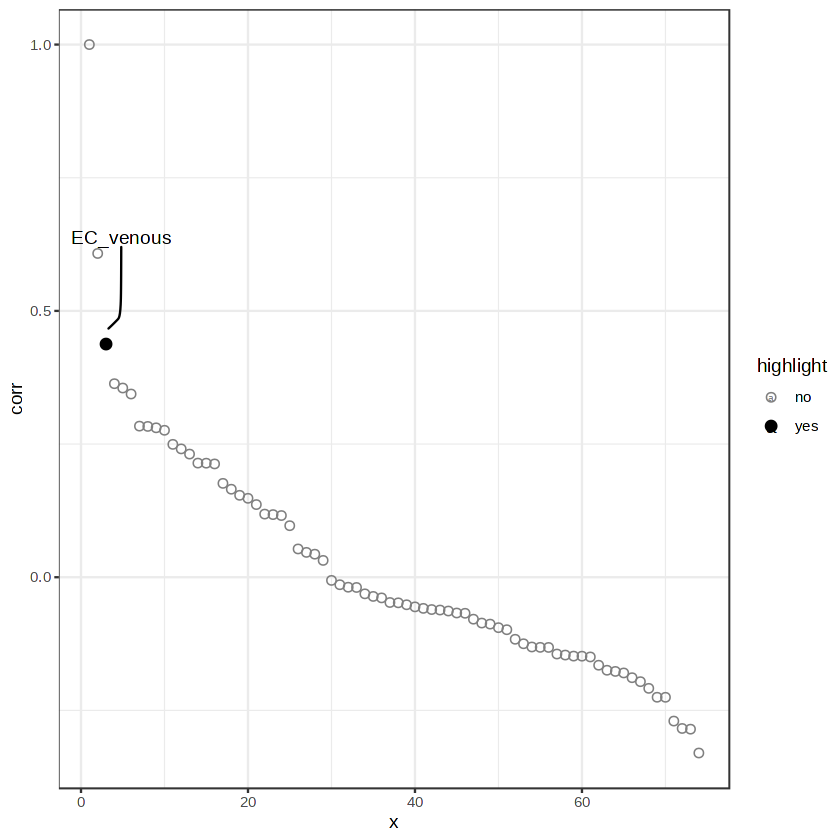

In [21]:
library(tidyverse)
library(ggrepel)
library(ggfun)
library(grid)

ggplot(ll %>% arrange(highlight),
       aes(x = x, y = corr, color = highlight, 
           size = highlight, shape = highlight)) +
       geom_point() + 
       scale_color_manual(values = c(no = 'grey50', yes = 'black')) + 
       scale_size_manual(values = c(no = 2, yes = 4)) + 
       scale_shape_manual(values = c(no = 1, yes = 20)) + 
geom_text_repel(data =  ll %>% filter(highlight == 'yes'),
                aes(x = x, y = corr, label = gene),
                box.padding = 0.5,
                nudge_x = 0.2,
                nudge_y = 0.2,
                segment.curvature = -0.1,
                segment.ncp = 3,
                segment.angle = 10,
                direction = "x", 
                hjust = "right",
                force = 5,
                point.padding = 1
                  ) +        
theme_bw()
ggsave("figures/GSE111889_celltype_corr_new_sc_ref.pdf", width = 6.2, height = 6)

In [12]:
pdf("GSE111889_celltype_corr.pdf", w=7, h=7)
ll <- Corr['Mucous_gland_neck',] %>% sort(decreasing=T)
par(las=1);plot(ll)
text(which(names(ll)=='EC_venous')+12, ll[which(names(ll)=='EC_venous')], labels='EC_venous')
dev.off()

png 
  2

In [5]:
mat <- read.table('/home/jovyan/farm/Gut/Deconvolution/GSE111889_host_tx_counts_norm.xls', check.names=F)
mat %>% head

,CSM5FZ1F,CSM5FZ1G,CSM5FZ1H,CSM5FZ1I,CSM5FZ1J,CSM5FZ1K,CSM5FZ1L,CSM5FZ1M,CSM5FZ1N,CSM5FZ1O,⋯,PSM6XC13,PSM6XC14,PSM6XC15,PSM7J4EU,PSM7J4EV,PSM7J4EW,PSM7J4EX,PSM7J4F3,PSM7J4F4,PSM7J4FL
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5S_rRNA,1.080733,2.107608,3.106095,2.044676,1.026653,2.070730,1.039419,3.126879,1.101525,1.008319,⋯,4.044430,2.005531,1.021167,2.005531,1.005538,1.002765,8.088859,2.039038,3.016615,2.082198
7SK,83.216469,40.044556,49.697514,108.367847,106.771954,15.530473,51.970934,120.905993,47.365587,77.640566,⋯,435.787291,164.453519,58.206525,175.483938,192.057828,201.555837,352.876484,153.947346,410.259653,68.712541
A1BG,1.080733,2.107608,1.035365,2.044676,7.186574,1.035365,2.078837,1.042293,1.101525,1.008319,⋯,7.077752,4.011061,3.063501,2.005531,2.011077,4.011061,2.022215,5.097594,1.005538,1.041099
A1BG-AS1,34.583468,24.237494,15.530473,68.496658,32.852909,14.495108,47.813259,38.564843,49.568638,125.031561,⋯,127.399533,102.282067,50.037188,90.248882,76.420916,54.149329,77.855270,57.093055,271.495359,16.657586
A1CF,3932.788702,2345.767919,2444.496491,1966.978665,9760.393865,5777.336052,5859.203101,9345.199453,2368.279366,2801.110294,⋯,8818.878781,2957.155044,2709.156338,2357.501359,5487.222860,2246.194404,5612.657202,4053.606938,436.403651,3498.093020
A2M,4523.949851,9439.977095,5246.193867,29276.698554,31206.156719,6326.079441,25541.635234,26942.232955,37875.946980,76451.757943,⋯,24977.386211,23791.610911,13633.602059,22586.286949,55610.293763,40571.886430,29819.579571,24781.444626,51570.040611,6232.019291


In [6]:
dim(theta)
dim(mat)

[1] 249  74

[1] 53065   251

In [7]:
mat <- mat[,rownames(theta)]
dim(mat)

[1] 53065   249

In [8]:
mat <- cbind(theta[,'Mucous_gland_neck'],
             t(mat))
dim(mat)

[1]   249 53066

In [9]:
Corr <- cor(mat)

In [10]:
Corr[1,] %>% sort(decreasing=T) %>% head(50)

TCN1          VTCN1          VSIG1        SLC4A11 
     1.0000000      0.8495605      0.8313037      0.7911281      0.7692750 
          LCN2 RP11-350J20.12          AZGP1          SFTA2           LY6D 
     0.7651398      0.7609087      0.7606736      0.7546700      0.7398619 
       SLCO4A1          CHAC1           SAA2            PF4       ARHGAP40 
     0.7238035      0.7150753      0.7104662      0.7072307      0.7048416 
      PDZK1IP1           SAA1           KRT7           MMP7          KRT80 
     0.7031815      0.7017844      0.6999457      0.6965587      0.6965213 
         KRT6C   RP11-469H8.6          BEAN1         TNFSF9         DUOXA2 
     0.6964548      0.6957883      0.6948794      0.6933295      0.6929758 
   RP11-20B7.1    RP6-65G23.1           MDFI          ANXA1          APOL1 
     0.6925388      0.6898236      0.6876688      0.6818560      0.6796907 
         INSL4       IGKV3-11  RP11-397C18.2            PI3       SERPINB7 
     0.6796267      0.6775696      0.6774445      0.6768179      0.6712377 
         SYT12    RP11-65J3.1  RP11-447E20.1        PLEKHN1           CBR3 
     0.6705578      0.6692579      0.6688840      0.6663158      0.6659265 
         CLDN1          DUOX2            PKM       IGHV4-59         SPRR2E 
     0.6652328      0.6580899      0.6571157      0.6562934      0.6554459 
         GPR87          KLK10          WFDC5          GNA15         SRD5A3 
     0.6537282      0.6527889      0.6490751      0.6489615      0.6488980

In [14]:
Corr[1,'MUC6']

[1] 0.4722621

In [15]:
write.csv(Corr[1,], file='./GSE111889_gene_corr_nor_counts_new_sc_ref.csv',quote=F)

In [16]:
mat <- read.csv('./GSE111889_gene_corr_nor_counts_new_sc_ref.csv')
mat %>% head

,corr_with_genes
,<dbl>
5S_rRNA,0.004971467
7SK,-0.022168325
A1BG,0.076958338
A1BG-AS1,0.163976741
A1CF,-0.294191723
A2M,0.136672103


In [17]:
mat <- as.data.frame(mat)
mat$highlight <- rep('no', nrow(mat))
mat %>% head

,corr_with_genes,highlight
,<dbl>,<chr>
5S_rRNA,0.004971467,no
7SK,-0.022168325,no
A1BG,0.076958338,no
A1BG-AS1,0.163976741,no
A1CF,-0.294191723,no
A2M,0.136672103,no


In [18]:
gene_list <- c('MUC6','MUC5AC','BPIFB1','AQP5','ACKR1','PROK2','CXCR1','CXCR2','FCGR3B')
mat[gene_list, 'highlight'] <- 'yes'

In [19]:
head(mat)

,corr_with_genes,highlight
,<dbl>,<chr>
5S_rRNA,0.004971467,no
7SK,-0.022168325,no
A1BG,0.076958338,no
A1BG-AS1,0.163976741,no
A1CF,-0.294191723,no
A2M,0.136672103,no


In [20]:
mat <- mat[order(mat$corr_with_genes, decreasing=T), ]
mat$x <- 1:nrow(mat)
mat$gene <- rownames(mat)
mat %>% head

,corr_with_genes,highlight,x,gene
,<dbl>,<chr>,<int>,<chr>
TCN1,0.8495605,no,1,TCN1
VTCN1,0.8313037,no,2,VTCN1
VSIG1,0.7911281,no,3,VSIG1
SLC4A11,0.7692750,no,4,SLC4A11
LCN2,0.7651398,no,5,LCN2
RP11-350J20.12,0.7609087,no,6,RP11-350J20.12


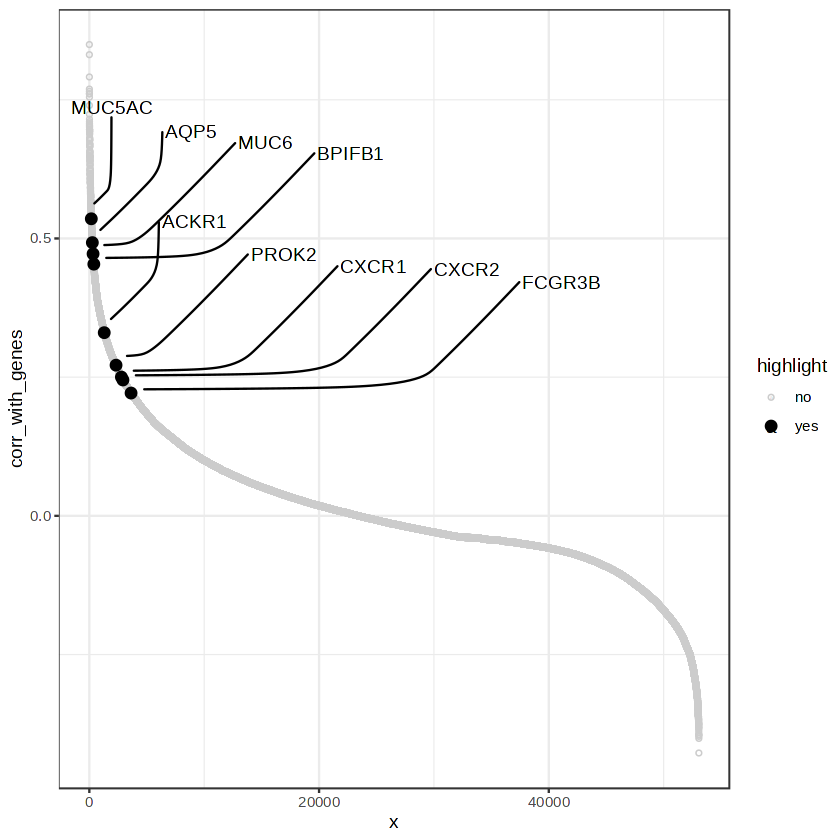

In [22]:
library(tidyverse)
library(ggrepel)
library(ggfun)
library(grid)

ggplot(mat %>% arrange(highlight),
       aes(x = x, y = corr_with_genes, color = highlight, 
           size = highlight, shape = highlight)) +
       geom_point() + 
       scale_color_manual(values = c(no = 'grey80', yes = 'black')) + 
       scale_size_manual(values = c(no = 1, yes = 4)) + 
       scale_shape_manual(values = c(no = 1, yes = 20)) + 
geom_text_repel(data =  mat %>% filter(highlight == 'yes'),
                aes(x = x, y = corr_with_genes, label = gene),
                box.padding = 0.5,
                nudge_x = 0.2,
                nudge_y = 0.2,
                segment.curvature = -0.1,
                segment.ncp = 3,
                segment.angle = 10,
                direction = "x", 
                hjust = "right",
                force = 5,
                point.padding = 1
                  ) +        
theme_bw()
ggsave("figures/GSE111889_gene_corr_nor_counts_new_sc_ref.pdf", width = 6.5, height = 6)

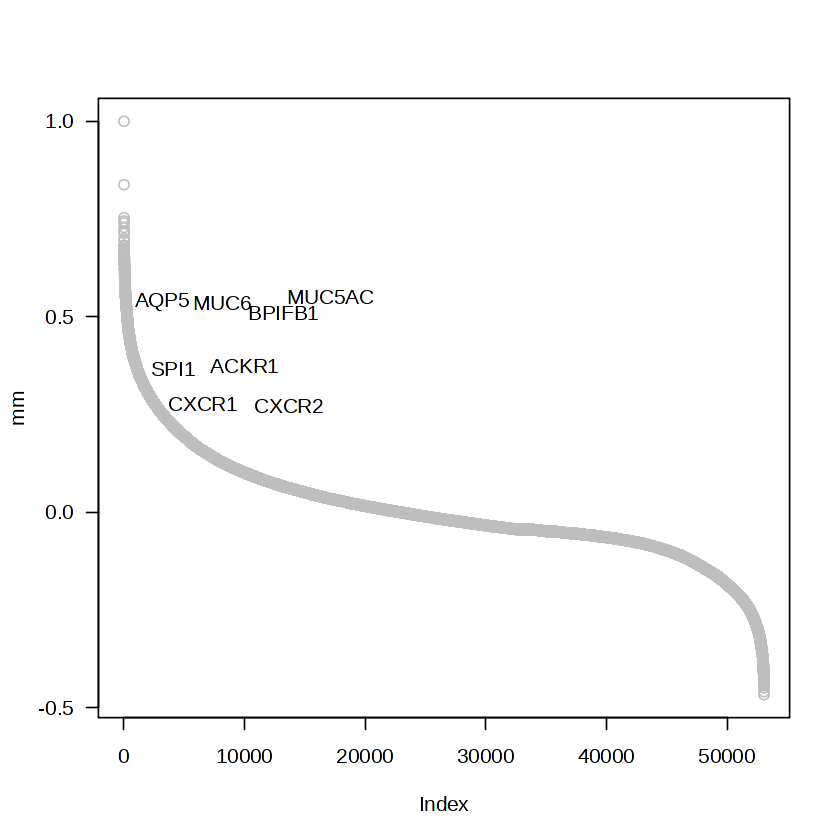

In [86]:
mm <- sort(Corr[1,],decreasing=T)
par(las=1);plot(mm, col="grey")
text(which(names(mm)=='SPI1')+3000, mm[which(names(mm)=='SPI1')], labels='SPI1')
text(which(names(mm)=='CXCR1')+4000, mm[which(names(mm)=='CXCR1')], labels='CXCR1')
text(which(names(mm)=='CXCR2')+11000, mm[which(names(mm)=='CXCR2')], labels='CXCR2')
text(which(names(mm)=='MUC6')+8000, mm[which(names(mm)=='MUC6')], labels='MUC6')
text(which(names(mm)=='BPIFB1')+13000, mm[which(names(mm)=='BPIFB1')], labels='BPIFB1')
text(which(names(mm)=='AQP5')+3000, mm[which(names(mm)=='AQP5')], labels='AQP5')
text(which(names(mm)=='ACKR1')+9000, mm[which(names(mm)=='ACKR1')], labels='ACKR1')
text(which(names(mm)=='MUC5AC')+17000, mm[which(names(mm)=='MUC5AC')], labels='MUC5AC')

In [87]:
pdf("GSE111889_gene_corr_nor_counts.pdf", w=7, h=7)
mm <- sort(Corr[1,],decreasing=T)
par(las=1);plot(mm, col="grey")
text(which(names(mm)=='SPI1')+3000, mm[which(names(mm)=='SPI1')], labels='SPI1')
text(which(names(mm)=='CXCR1')+4000, mm[which(names(mm)=='CXCR1')], labels='CXCR1')
text(which(names(mm)=='CXCR2')+11000, mm[which(names(mm)=='CXCR2')], labels='CXCR2')
text(which(names(mm)=='MUC6')+8000, mm[which(names(mm)=='MUC6')], labels='MUC6')
text(which(names(mm)=='BPIFB1')+13000, mm[which(names(mm)=='BPIFB1')], labels='BPIFB1')
text(which(names(mm)=='AQP5')+3000, mm[which(names(mm)=='AQP5')], labels='AQP5')
text(which(names(mm)=='ACKR1')+9000, mm[which(names(mm)=='ACKR1')], labels='ACKR1')
text(which(names(mm)=='MUC5AC')+17000, mm[which(names(mm)=='MUC5AC')], labels='MUC5AC')
dev.off()

png 
  2

In [25]:
write.csv(Corr[1,], file="./GSE111889_gene_corr_nor_counts.csv",quote=F)

#### E_MTAB_5464

In [31]:
load('/lustre/scratch126/cellgen/team205/rl20/Gut/BayesPrism_out/E_MTAB_5464_fine_grained_annot_disease_only_new_sc_ref.rdata')

In [32]:
theta <- get.fraction(bp=bp.res,
            which.theta="final",
            state.or.type="type")

head(theta)

,Trm_Th17,Trm/em_CD8,Tfh_naive,B_plasma_IgA1,TA,Enterocyte,ILC3,Treg_IL10,Goblet_progenitor,Monocyte,⋯,Glial_2,Neuroblast,Macrophage_LYVE1,DC_langerhans,Glial_1,Oesophagus_fibroblast,Immune_recruiting_pericyte,Rectum_fibroblast,EC_cycling,Erythrocytes
ERR2270963,2.951314e-05,2.664299e-05,2.218460e-05,6.677739e-04,0.002061031,1.856775e-05,8.230299e-04,1.354940e-05,1.247142e-05,2.222492e-05,⋯,3.441488e-05,5.603859e-04,0.015007025,9.601697e-06,0.0038145684,2.572268e-05,1.118161e-05,0.0008708424,1.200945e-05,9.424722e-05
ERR2270964,1.869904e-04,4.281146e-05,1.091165e-03,2.007211e-03,0.082537579,1.652605e-05,4.271609e-03,9.964572e-05,1.195854e-05,1.531249e-03,⋯,1.016272e-03,5.768424e-05,0.052020167,8.320809e-06,0.0087170073,1.796966e-03,1.906560e-05,0.0132307996,1.843518e-05,3.589744e-03
ERR2270965,1.699380e-05,1.335464e-05,4.948554e-04,3.260267e-03,0.027742600,1.087527e-05,2.550994e-03,4.858923e-05,3.225356e-03,1.724041e-05,⋯,2.971755e-05,1.729347e-04,0.027271100,1.055214e-05,0.0026584570,4.446103e-04,8.101221e-06,0.0236921127,2.015464e-05,1.140812e-03
ERR2270966,5.110304e-06,3.546814e-06,3.772600e-06,3.383922e-06,0.143832870,1.989847e-05,4.643801e-06,3.601205e-06,2.551983e-05,3.951243e-06,⋯,9.537270e-06,2.858685e-03,0.001726533,8.638235e-06,0.0023985396,2.926699e-05,1.397528e-05,0.0014805386,1.639948e-05,2.313965e-05
ERR2270967,5.427199e-06,3.764581e-06,5.088888e-06,6.244020e-06,0.065079888,8.275642e-03,1.849902e-03,4.983317e-06,1.745305e-05,3.706057e-06,⋯,7.915511e-06,2.225072e-03,0.006442722,2.461827e-06,0.0023961293,2.254677e-05,6.725643e-05,0.0067124625,4.462196e-04,8.897948e-05
ERR2270968,3.137116e-06,2.842193e-06,3.255146e-06,5.105841e-06,0.054227933,5.290546e-06,2.856975e-03,3.091161e-06,3.907945e-06,2.783837e-06,⋯,5.153541e-06,5.324750e-04,0.003794623,7.845229e-06,0.0001318338,4.294372e-05,2.287396e-05,0.0009927610,1.349907e-03,6.127315e-06


In [33]:
Corr <- cor(theta)
Corr %>% head

,Trm_Th17,Trm/em_CD8,Tfh_naive,B_plasma_IgA1,TA,Enterocyte,ILC3,Treg_IL10,Goblet_progenitor,Monocyte,⋯,Glial_2,Neuroblast,Macrophage_LYVE1,DC_langerhans,Glial_1,Oesophagus_fibroblast,Immune_recruiting_pericyte,Rectum_fibroblast,EC_cycling,Erythrocytes
Trm_Th17,1.00000000,0.05517598,0.97622487,0.98631594,-0.08266998,-0.10948898,-0.118461408,0.01744693,-0.03447638,0.1959724,⋯,0.32755380,-0.04966750,0.68504590,0.01312724,0.1195044,-0.02271444,-0.08172260,0.11111604,-0.09187066,0.1784400
Trm/em_CD8,0.05517598,1.00000000,-0.03699671,-0.02438029,0.10553879,-0.21450128,-0.163285663,0.35861864,-0.05798176,0.2653429,⋯,0.22674026,0.05189224,0.13059186,0.06667676,0.1383690,0.25237115,-0.02207939,0.30432133,-0.11931184,0.2903059
Tfh_naive,0.97622487,-0.03699671,1.00000000,0.98908790,-0.12079671,-0.06219286,-0.025449408,-0.03820707,-0.04683478,0.1543791,⋯,0.30551244,-0.05737073,0.70347538,0.05422281,0.1066299,-0.02978820,-0.04266761,0.04106863,-0.07098293,0.1366074
B_plasma_IgA1,0.98631594,-0.02438029,0.98908790,1.00000000,-0.11151919,-0.09724804,-0.079379392,-0.02320992,-0.04326073,0.1398564,⋯,0.31464576,-0.04142663,0.70864223,0.01882764,0.1340207,-0.02133778,-0.06499619,0.05943628,-0.06848691,0.1230360
TA,-0.08266998,0.10553879,-0.12079671,-0.11151919,1.00000000,-0.38003690,-0.341867039,0.04693382,-0.05696488,0.3524088,⋯,-0.11412230,0.05024597,-0.04240208,-0.07366518,0.4294110,0.17431524,-0.10268680,-0.05808030,-0.05620070,0.2524790
Enterocyte,-0.10948898,-0.21450128,-0.06219286,-0.09724804,-0.38003690,1.00000000,-0.006706317,-0.15341402,-0.17041540,-0.1218712,⋯,-0.08850789,-0.50102363,-0.39977132,-0.09548668,-0.5819016,-0.19686264,0.21938133,-0.40046149,-0.08431629,-0.1707500


In [34]:
ll <- Corr['Mucous_gland_neck',] %>% sort(decreasing=T)
ll <- data.frame(corr = ll, highlight = rep('no', length(ll)))
ll %>% head

,corr,highlight
,<dbl>,<chr>
Mucous_gland_neck,1.0000000,no
Erythrocytes,0.7625740,no
Oral_mucosa_fibroblast,0.7153624,no
Monocyte,0.6576322,no
Pericyte,0.6492290,no
EC_venous,0.4790791,no


In [35]:
ll['EC_venous', 'highlight'] <- 'yes'
ll$gene <- rownames(ll)
ll$x <- 1:nrow(ll)

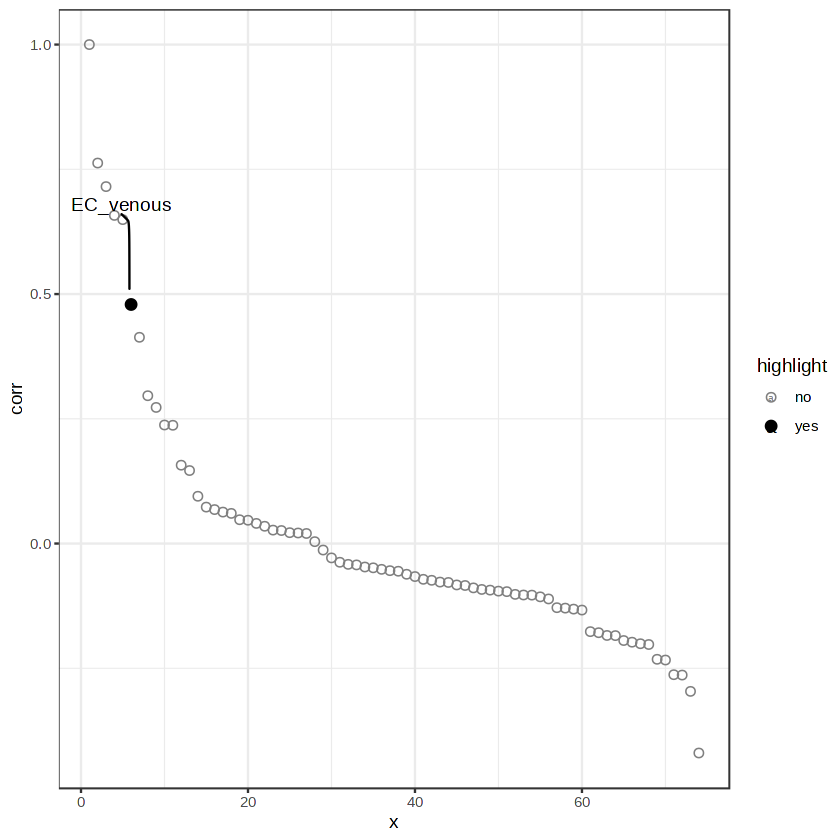

In [37]:
library(tidyverse)
library(ggrepel)
library(ggfun)
library(grid)

ggplot(ll %>% arrange(highlight),
       aes(x = x, y = corr, color = highlight, 
           size = highlight, shape = highlight)) +
       geom_point() + 
       scale_color_manual(values = c(no = 'grey50', yes = 'black')) + 
       scale_size_manual(values = c(no = 2, yes = 4)) + 
       scale_shape_manual(values = c(no = 1, yes = 20)) + 
geom_text_repel(data =  ll %>% filter(highlight == 'yes'),
                aes(x = x, y = corr, label = gene),
                box.padding = 0.5,
                nudge_x = 0.2,
                nudge_y = 0.2,
                segment.curvature = -0.1,
                segment.ncp = 3,
                segment.angle = 10,
                direction = "x", 
                hjust = "right",
                force = 5,
                point.padding = 1
                  ) +        
theme_bw()
ggsave("figures/E_MTAB_5464_celltype_corr_new_sc_ref.pdf", width = 6.2, height = 6)

In [29]:
#write.csv(Corr['Mucous_gland_neck',] %>% sort(decreasing=T), file='./E_MTAB_5464_cell_type_corr.csv',quote=F)

In [43]:
mat <- read.table('/home/jovyan/farm/Gut/Deconvolution/E_MTAB_5464/E-MTAB-5464-nor-counts_rmdup.txt', check.names=F)
mat %>% head

,ERR2271011,ERR2271007,ERR2271003,ERR2270965,ERR2270986,ERR2271000,ERR2270977,ERR2270967,ERR2270964,ERR2271035,⋯,ERR2270966,ERR2271006,ERR2270983,ERR2270971,ERR2271024,ERR2270970,ERR2271023,ERR2271022,ERR2270982,ERR2271029
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5_8S_rRNA,0.0000000,0.000000,0.000,0.000000,0.00000,0.000000,0.0000,0.0000000,0.0000000,0.000000,⋯,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000
5S_rRNA,0.0000000,0.000000,0.000,0.000000,0.00000,0.000000,0.0000,0.0000000,0.0000000,0.000000,⋯,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000
7SK,0.0000000,0.000000,0.000,0.000000,0.00000,0.000000,0.0000,0.0000000,0.0000000,0.000000,⋯,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000
A1BG,1.5475706,0.000000,0.000,1.844166,1.80101,1.264898,0.0000,0.0000000,0.8343611,0.000000,⋯,0.000000,2.500222,0.0000,0.000000,2.982270,1.699310,0.00000,2.492910,0.0000,1.700275
A1BG-AS1,0.7737853,3.332964,0.000,4.303055,0.00000,0.000000,0.0000,0.5211796,10.0123327,1.660136,⋯,1.299592,2.500222,0.0000,2.360815,9.692379,5.097931,1.28399,5.484401,0.0000,2.833791
A1CF,1575.4268639,1154.871888,1852.682,414.322699,452.05360,1745.559789,744.9487,568.0857747,317.8915645,614.250271,⋯,1216.417839,960.085430,646.5808,809.759700,197.575417,561.622091,455.81646,306.129294,656.2378,582.627503


In [44]:
theta %>% dim
mat %>% dim


[1] 79 74

[1] 39331    79

In [45]:
mat <- mat[,rownames(theta)]
mat <- cbind(theta[,'Mucous_gland_neck'],
             t(mat))
dim(mat)

[1]    79 39332

In [46]:
Corr <- cor(mat)

Warning message in cor(mat):
“the standard deviation is zero”


In [47]:
#Corr[1,] %>% sort(decreasing=T) %>% head(50)

In [48]:
Corr['MUC6','CXCR2']

[1] 0.5968992

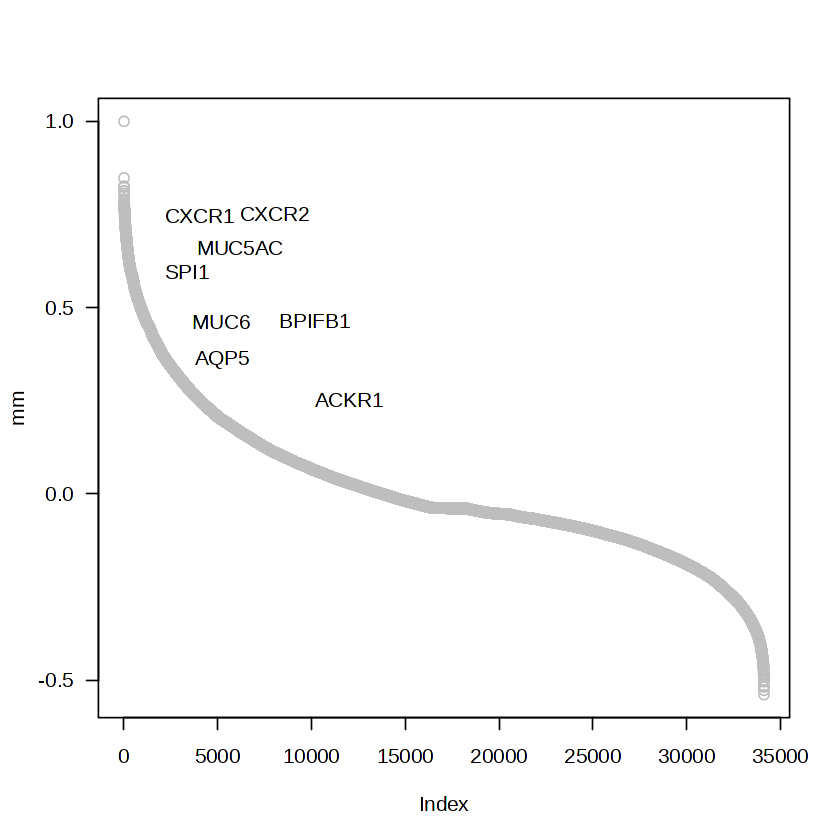

In [49]:
mm <- sort(Corr[1,],decreasing=T)
par(las=1);plot(mm, col="grey")
text(which(names(mm)=='SPI1')+3000, mm[which(names(mm)=='SPI1')], labels='SPI1')
text(which(names(mm)=='CXCR1')+4000, mm[which(names(mm)=='CXCR1')], labels='CXCR1')
text(which(names(mm)=='CXCR2')+8000, mm[which(names(mm)=='CXCR2')], labels='CXCR2')
text(which(names(mm)=='MUC6')+4000, mm[which(names(mm)=='MUC6')], labels='MUC6')
text(which(names(mm)=='BPIFB1')+9000, mm[which(names(mm)=='BPIFB1')], labels='BPIFB1')
text(which(names(mm)=='AQP5')+3000, mm[which(names(mm)=='AQP5')], labels='AQP5')
text(which(names(mm)=='ACKR1')+8000, mm[which(names(mm)=='ACKR1')], labels='ACKR1')
text(which(names(mm)=='MUC5AC')+6000, mm[which(names(mm)=='MUC5AC')], labels='MUC5AC')

In [101]:
pdf("E-MTAB-5464_gene_corr_nor_counts.pdf", w=7, h=7)
mm <- sort(Corr[1,],decreasing=T)
par(las=1);plot(mm, col="grey")
text(which(names(mm)=='SPI1')+3000, mm[which(names(mm)=='SPI1')], labels='SPI1')
text(which(names(mm)=='CXCR1')+4000, mm[which(names(mm)=='CXCR1')], labels='CXCR1')
text(which(names(mm)=='CXCR2')+8000, mm[which(names(mm)=='CXCR2')], labels='CXCR2')
text(which(names(mm)=='MUC6')+4000, mm[which(names(mm)=='MUC6')], labels='MUC6')
text(which(names(mm)=='BPIFB1')+9000, mm[which(names(mm)=='BPIFB1')], labels='BPIFB1')
text(which(names(mm)=='AQP5')+3000, mm[which(names(mm)=='AQP5')], labels='AQP5')
text(which(names(mm)=='ACKR1')+8000, mm[which(names(mm)=='ACKR1')], labels='ACKR1')
text(which(names(mm)=='MUC5AC')+6000, mm[which(names(mm)=='MUC5AC')], labels='MUC5AC')
dev.off()

png 
  2

In [50]:
write.csv(Corr[1,], file="./E-MTAB-5464_gene_corr_nor_counts_new_sc_ref.csv",quote=F)

In [51]:
mat <- read.csv('./E-MTAB-5464_gene_corr_nor_counts_new_sc_ref.csv')
mat %>% head

,corr_with_genes
,<dbl>
5_8S_rRNA,NA
5S_rRNA,NA
7SK,NA
A1BG,0.1881944
A1BG-AS1,0.2718287
A1CF,-0.3172086


In [52]:
mat <- as.data.frame(mat)
mat$highlight <- rep('no', nrow(mat))
gene_list <- c('MUC6','MUC5AC','BPIFB1','AQP5','ACKR1','PROK2','CXCR1','CXCR2','FCGR3B')

mat[gene_list, 'highlight'] <- 'yes'
mat <- mat %>% drop_na()
mat %>% head

,corr_with_genes,highlight
,<dbl>,<chr>
A1BG,0.18819438,no
A1BG-AS1,0.27182868,no
A1CF,-0.31720862,no
A2M,0.22527138,no
A2M-AS1,-0.04334411,no
A2ML1,0.04756193,no


In [53]:
mat <- mat[order(mat[,1], decreasing=T), ]
mat$x <- 1:nrow(mat)
mat$gene <- rownames(mat)
mat %>% head

,corr_with_genes,highlight,x,gene
,<dbl>,<chr>,<int>,<chr>
MMP8,0.8481868,no,1,MMP8
STEAP4,0.8260846,no,2,STEAP4
SLC11A1,0.8233420,no,3,SLC11A1
PROK2,0.8135572,yes,4,PROK2
TCN1,0.8129821,no,5,TCN1
RN7SL124P,0.8063519,no,6,RN7SL124P


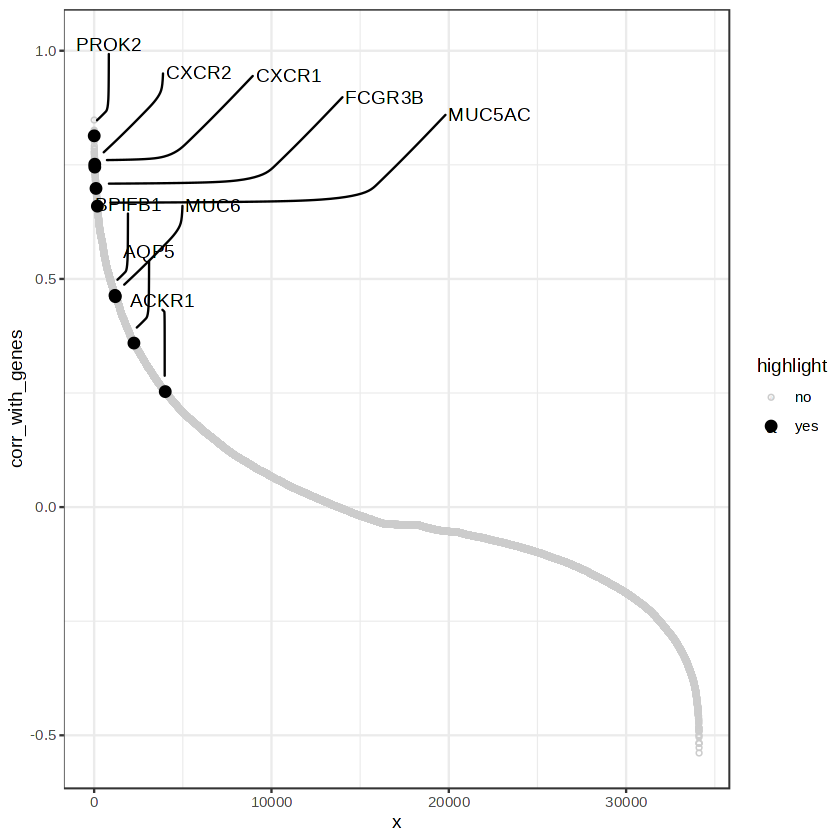

In [54]:
library(tidyverse)
library(ggrepel)
library(ggfun)
library(grid)

ggplot(mat %>% arrange(highlight),
       aes(x = x, y = corr_with_genes, color = highlight, 
           size = highlight, shape = highlight)) +
       geom_point() + 
       scale_color_manual(values = c(no = 'grey80', yes = 'black')) + 
       scale_size_manual(values = c(no = 1, yes = 4)) + 
       scale_shape_manual(values = c(no = 1, yes = 20)) + 
geom_text_repel(data =  mat %>% filter(highlight == 'yes'),
                aes(x = x, y = corr_with_genes, label = gene),
                box.padding = 0.5,
                nudge_x = 0.2,
                nudge_y = 0.2,
                segment.curvature = -0.1,
                segment.ncp = 3,
                segment.angle = 10,
                direction = "x", 
                hjust = "right",
                force = 5,
                point.padding = 1
                  ) +        
theme_bw()
ggsave("figures/E_MTAB_5464_gene_corr_nor_counts_new_sc_ref.pdf", width = 6.5, height = 6)

#### E-GEOD-101794

In [38]:
load('/lustre/scratch126/cellgen/team205/rl20/Gut/BayesPrism_out/E_CEOD_101794_fine_grained_annot_disease_only_new_sc_ref.rdata')

In [39]:
theta <- get.fraction(bp=bp.res,
            which.theta="final",
            state.or.type="type")

head(theta)

,Trm_Th17,Trm/em_CD8,Tfh_naive,B_plasma_IgA1,TA,Enterocyte,ILC3,Treg_IL10,Goblet_progenitor,Monocyte,⋯,Glial_2,Neuroblast,Macrophage_LYVE1,DC_langerhans,Glial_1,Oesophagus_fibroblast,Immune_recruiting_pericyte,Rectum_fibroblast,EC_cycling,Erythrocytes
SRR5861974,1.143677e-05,4.701361e-06,7.442831e-06,3.145727e-06,1.351912e-06,0.84505399,3.632809e-05,7.137126e-06,2.334311e-06,1.014228e-05,⋯,1.140209e-03,6.295627e-06,5.066890e-06,6.296149e-06,7.080271e-06,2.291126e-03,7.362413e-06,1.111992e-05,1.210472e-03,3.971807e-03
SRR5861975,1.180092e-04,2.068004e-05,2.385542e-05,4.593757e-06,4.278731e-04,0.64036509,3.080801e-05,7.940434e-06,4.242883e-06,1.731173e-06,⋯,1.626579e-03,3.919296e-05,2.580124e-02,2.315544e-05,1.838102e-03,8.774271e-06,3.049020e-05,2.930478e-03,2.825261e-03,1.077798e-06
SRR5861976,1.377049e-02,4.010303e-03,3.520986e-05,1.812115e-05,1.298353e-01,0.07387349,3.488410e-05,1.312060e-03,5.145023e-03,3.884925e-02,⋯,2.149704e-03,1.977633e-04,1.401691e-02,1.536271e-05,7.560778e-04,4.774939e-03,3.628786e-04,1.816616e-05,4.085124e-03,1.572157e-02
SRR5861977,1.692073e-06,4.031744e-06,3.348692e-06,2.793446e-06,4.754375e-04,0.52965408,1.469865e-05,4.586059e-06,4.441921e-06,1.123990e-03,⋯,1.525048e-05,4.702328e-04,4.128130e-02,1.238386e-03,2.665133e-03,2.493083e-06,8.273126e-06,4.909824e-03,5.453063e-06,5.466907e-03
SRR5861978,4.314030e-06,4.452151e-06,5.672876e-06,7.796237e-06,3.096435e-06,0.67691301,1.077185e-05,4.335845e-06,7.654752e-06,1.881442e-06,⋯,1.879261e-05,3.032750e-03,3.961885e-02,7.742634e-04,3.768476e-04,2.483236e-06,1.399693e-04,3.948176e-03,7.005151e-06,1.204150e-06
SRR5861979,9.946313e-05,1.968192e-05,9.745683e-06,4.696709e-04,1.155001e-01,0.30849547,7.846800e-06,2.524810e-05,2.922997e-02,5.537543e-04,⋯,3.065704e-04,4.952419e-05,4.329905e-02,4.093849e-05,3.406867e-03,2.065408e-03,9.425942e-06,2.235047e-02,8.189967e-06,2.300167e-03


In [41]:
Corr <- cor(theta)

ll <- Corr['Mucous_gland_neck',] %>% sort(decreasing=T)
ll <- data.frame(corr = ll, highlight = rep('no', length(ll)))
ll['EC_venous', 'highlight'] <- 'yes'
ll$gene <- rownames(ll)
ll$x <- 1:nrow(ll)

ll %>% head

,corr,highlight,gene,x
,<dbl>,<chr>,<chr>,<int>
Mucous_gland_neck,1.0000000,no,Mucous_gland_neck,1
Pericyte,0.2097028,no,Pericyte,2
TA,0.1727332,no,TA,3
EC_capillary,0.1599658,no,EC_capillary,4
Oral_mucosa_fibroblast,0.1537546,no,Oral_mucosa_fibroblast,5
EC_venous,0.1183099,yes,EC_venous,6


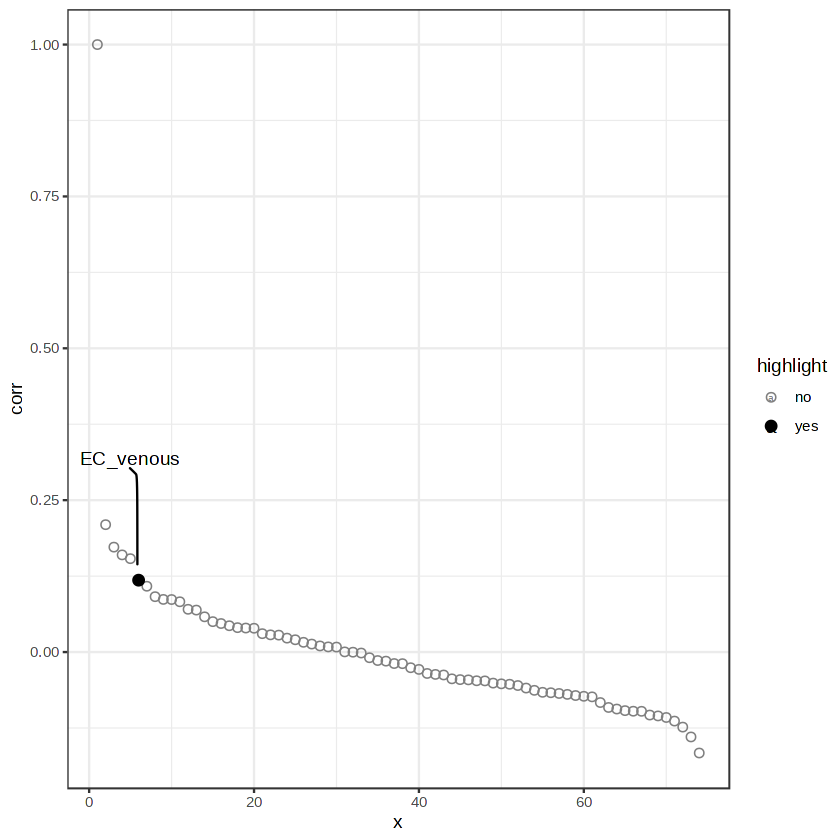

In [42]:
library(tidyverse)
library(ggrepel)
library(ggfun)
library(grid)

ggplot(ll %>% arrange(highlight),
       aes(x = x, y = corr, color = highlight, 
           size = highlight, shape = highlight)) +
       geom_point() + 
       scale_color_manual(values = c(no = 'grey50', yes = 'black')) + 
       scale_size_manual(values = c(no = 2, yes = 4)) + 
       scale_shape_manual(values = c(no = 1, yes = 20)) + 
geom_text_repel(data =  ll %>% filter(highlight == 'yes'),
                aes(x = x, y = corr, label = gene),
                box.padding = 0.5,
                nudge_x = 0.2,
                nudge_y = 0.2,
                segment.curvature = -0.1,
                segment.ncp = 3,
                segment.angle = 10,
                direction = "x", 
                hjust = "right",
                force = 5,
                point.padding = 1
                  ) +        
theme_bw()
ggsave("figures/E_CEOD_101794_celltype_corr_new_sc_ref.pdf", width = 6.2, height = 6)

In [7]:
mat <- read.table('/home/jovyan/farm/Gut/Deconvolution/E_CEOD_101794/E-GEOD-101794-norm-counts_genes.txt', check.names=F)
mat %>% head

,SRR5861974,SRR5861975,SRR5861976,SRR5861977,SRR5861978,SRR5861979,SRR5861980,SRR5861981,SRR5861982,SRR5861983,⋯,SRR5862268,SRR5862269,SRR5862270,SRR5862271,SRR5862272,SRR5862273,SRR5862274,SRR5862275,SRR5862276,SRR5862277
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DEFB108A,0,0.000000,0.000000,0.0000000,0,0,0,0.000000,0,0,⋯,0.0000000,0,0.0000000,0.0000000,0.000000,0.0000000,0,0,0,0
DEFB108D,0,0.000000,0.000000,0.0000000,0,0,0,0.000000,0,0,⋯,0.0000000,0,0.0000000,0.0000000,0.000000,0.0000000,0,0,0,0
PSMA2P3,0,2.040223,4.242563,0.5365065,0,0,0,1.377688,0,0,⋯,0.9165115,0,0.0000000,0.0000000,0.000000,0.0000000,0,0,0,0
DEFB108E,0,0.000000,0.000000,0.0000000,0,0,0,0.000000,0,0,⋯,0.0000000,0,0.0000000,0.0000000,0.000000,0.0000000,0,0,0,0
OR10V3P,0,0.000000,2.121281,0.0000000,0,0,0,0.000000,0,0,⋯,0.9165115,0,0.0000000,0.8513859,0.000000,0.8702195,0,0,0,0
PSMA2P1,0,2.040223,0.000000,0.0000000,0,0,0,0.000000,0,0,⋯,0.9165115,0,0.7005361,0.0000000,1.043061,0.0000000,0,0,0,0


In [8]:
theta %>% dim
mat %>% dim

[1] 304  74

[1] 38592   304

In [9]:
mat <- mat[,rownames(theta)]
mat <- cbind(theta[,'Mucous_gland_neck'],
             t(mat))
dim(mat)

[1]   304 38593

In [10]:
Corr <- cor(mat)

Warning message in cor(mat):
“the standard deviation is zero”


In [11]:
Corr['MUC6','MUC5AC']

[1] 0.5631237

In [12]:
Corr[1,1:10]

DEFB108A     DEFB108D      PSMA2P3     DEFB108E      OR10V3P 
 1.000000000           NA -0.012895773  0.023471337  0.002496224 -0.039765779 
     PSMA2P1    LINC01634       SHQ1P1       CPHL1P 
 0.017589634  0.031621116 -0.023658678  0.016317451

In [13]:
write.csv(Corr[1,], file="./E-GEOD-101794_gene_corr_nor_counts_new_sc_ref.csv",quote=F)

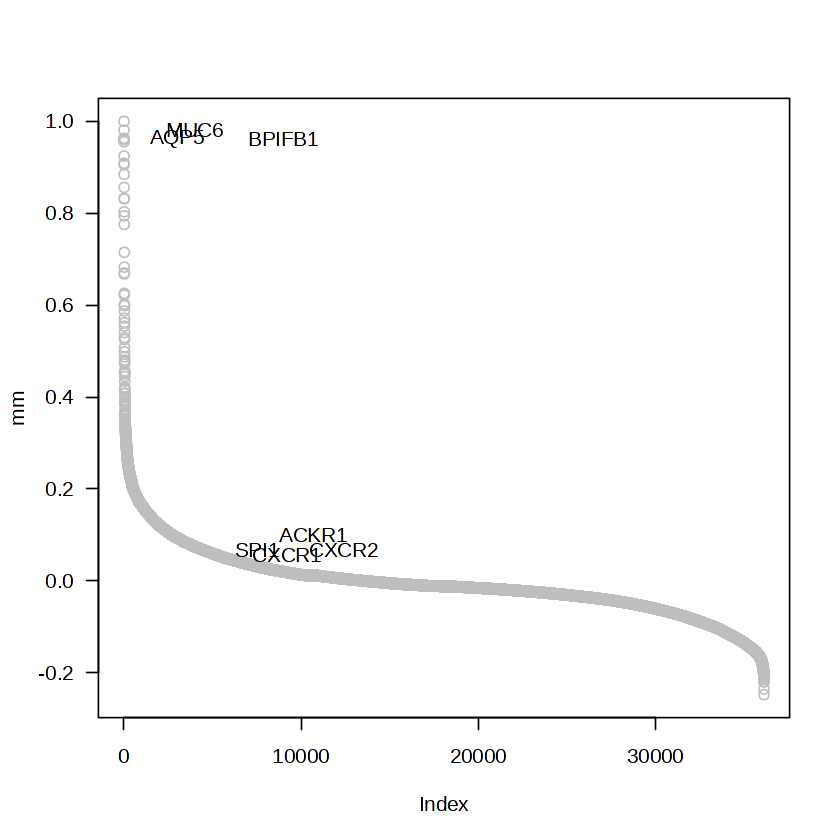

In [164]:
mm <- sort(Corr[1,],decreasing=T)
par(las=1);plot(mm, col="grey")
text(which(names(mm)=='SPI1')+3000, mm[which(names(mm)=='SPI1')], labels='SPI1')
text(which(names(mm)=='CXCR1')+4000, mm[which(names(mm)=='CXCR1')], labels='CXCR1')
text(which(names(mm)=='CXCR2')+8000, mm[which(names(mm)=='CXCR2')], labels='CXCR2')
text(which(names(mm)=='MUC6')+4000, mm[which(names(mm)=='MUC6')], labels='MUC6')
text(which(names(mm)=='BPIFB1')+9000, mm[which(names(mm)=='BPIFB1')], labels='BPIFB1')
text(which(names(mm)=='AQP5')+3000, mm[which(names(mm)=='AQP5')], labels='AQP5')
text(which(names(mm)=='ACKR1')+8000, mm[which(names(mm)=='ACKR1')], labels='ACKR1')

In [61]:
pdf("E_CEOD_101794_gene_corr_nor_counts.pdf", w=7, h=7)
mm <- sort(Corr[1,],decreasing=T)
par(las=1);plot(mm, col="grey")
text(which(names(mm)=='SPI1')+3000, mm[which(names(mm)=='SPI1')], labels='SPI1')
text(which(names(mm)=='CXCR1')+4000, mm[which(names(mm)=='CXCR1')], labels='CXCR1')
text(which(names(mm)=='CXCR2')+11000, mm[which(names(mm)=='CXCR2')], labels='CXCR2')
text(which(names(mm)=='MUC6')+4000, mm[which(names(mm)=='MUC6')], labels='MUC6')
text(which(names(mm)=='BPIFB1')+15000, mm[which(names(mm)=='BPIFB1')], labels='BPIFB1')
text(which(names(mm)=='AQP5')+3000, mm[which(names(mm)=='AQP5')], labels='AQP5')
text(which(names(mm)=='ACKR1')+9000, mm[which(names(mm)=='ACKR1')], labels='ACKR1')
dev.off()

png 
  2

In [14]:
mat <- read.csv('./E-GEOD-101794_gene_corr_nor_counts_new_sc_ref.csv')
mat %>% head

,corr_with_genes
,<dbl>
DEFB108A,NA
DEFB108D,-0.012895773
PSMA2P3,0.023471337
DEFB108E,0.002496224
OR10V3P,-0.039765779
PSMA2P1,0.017589634


In [15]:
mat <- as.data.frame(mat)
mat$highlight <- rep('no', nrow(mat))
gene_list <- c('MUC6','MUC5AC','BPIFB1','AQP5','ACKR1','PROK2','CXCR1','CXCR2','FCGR3B')

mat[gene_list, 'highlight'] <- 'yes'
mat <- mat %>% drop_na()
mat %>% head

,corr_with_genes,highlight
,<dbl>,<chr>
DEFB108D,-0.012895773,no
PSMA2P3,0.023471337,no
DEFB108E,0.002496224,no
OR10V3P,-0.039765779,no
PSMA2P1,0.017589634,no
LINC01634,0.031621116,no


In [16]:
mat <- mat[order(mat[,1], decreasing=T), ]
mat$x <- 1:nrow(mat)
mat$gene <- rownames(mat)
mat %>% head

,corr_with_genes,highlight,x,gene
,<dbl>,<chr>,<int>,<chr>
MUC6,0.9749976,yes,1,MUC6
BPIFB1,0.9669425,yes,2,BPIFB1
PGC,0.9594567,no,3,PGC
A4GNT,0.9578536,no,4,A4GNT
AQP5,0.9502218,yes,5,AQP5
LINC02688,0.9163909,no,6,LINC02688


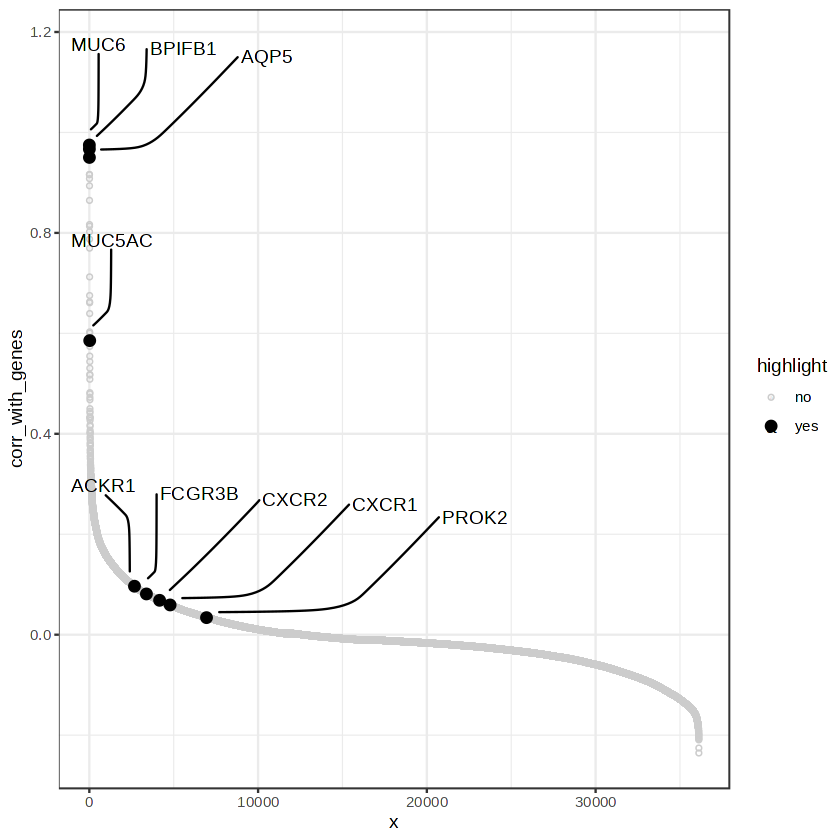

In [17]:
library(tidyverse)
library(ggrepel)
library(ggfun)
library(grid)

ggplot(mat %>% arrange(highlight),
       aes(x = x, y = corr_with_genes, color = highlight, 
           size = highlight, shape = highlight)) +
       geom_point() + 
       scale_color_manual(values = c(no = 'grey80', yes = 'black')) + 
       scale_size_manual(values = c(no = 1, yes = 4)) + 
       scale_shape_manual(values = c(no = 1, yes = 20)) + 
geom_text_repel(data =  mat %>% filter(highlight == 'yes'),
                aes(x = x, y = corr_with_genes, label = gene),
                box.padding = 0.5,
                nudge_x = 0.2,
                nudge_y = 0.2,
                segment.curvature = -0.1,
                segment.ncp = 3,
                segment.angle = 10,
                direction = "x", 
                hjust = "right",
                force = 5,
                point.padding = 1
                  ) +        
theme_bw()
ggsave("figures/E-GEOD-101794_gene_corr_nor_counts_new_sc_ref.pdf", width = 6.5, height = 6)

#### TCGA COAD

In [43]:
load("/lustre/scratch126/cellgen/team205/rl20/Gut/BayesPrism_out/COAD_TCGA_fine_grained_annot_disease_only_new_sc_ref.rdata")

In [44]:
# extract posterior mean of cell type fraction theta
theta <- get.fraction(bp=bp.res,
            which.theta="final",
            state.or.type="type")

In [45]:
Corr <- cor(theta)

ll <- Corr['Mucous_gland_neck',] %>% sort(decreasing=T)
ll <- data.frame(corr = ll, highlight = rep('no', length(ll)))
ll['EC_venous', 'highlight'] <- 'yes'
ll$gene <- rownames(ll)
ll$x <- 1:nrow(ll)

ll %>% head

,corr,highlight,gene,x
,<dbl>,<chr>,<chr>,<int>
Mucous_gland_neck,1.0000000,no,Mucous_gland_neck,1
Goblet_progenitor,0.3085043,no,Goblet_progenitor,2
DC_cDC1,0.2304886,no,DC_cDC1,3
Paneth,0.2276683,no,Paneth,4
Oral_mucosa_fibroblast,0.1749093,no,Oral_mucosa_fibroblast,5
Goblet,0.1681464,no,Goblet,6


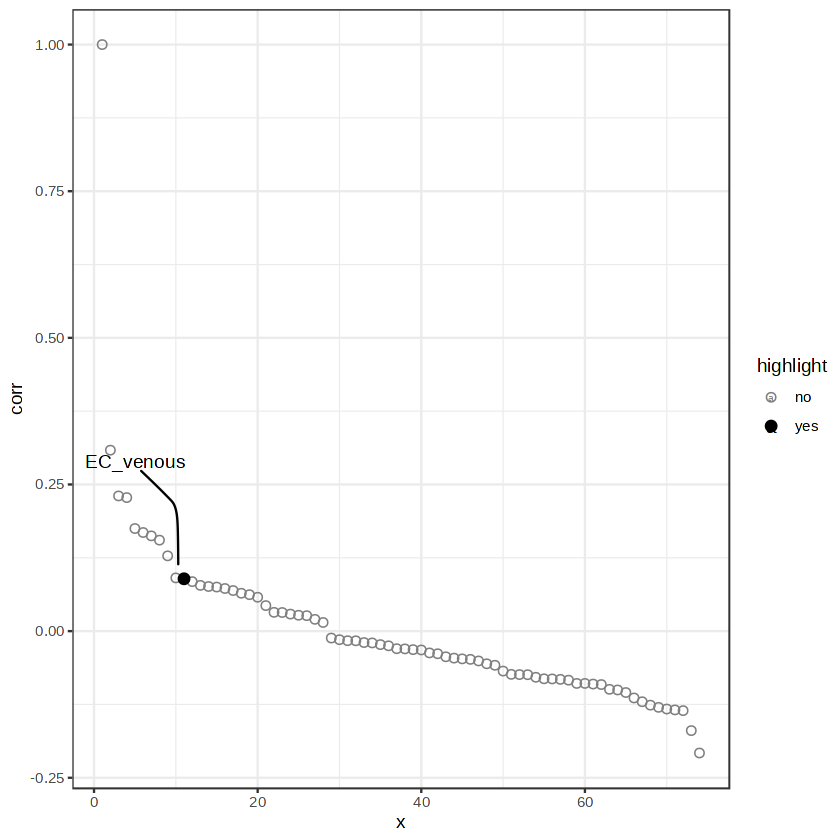

In [46]:
library(tidyverse)
library(ggrepel)
library(ggfun)
library(grid)

ggplot(ll %>% arrange(highlight),
       aes(x = x, y = corr, color = highlight, 
           size = highlight, shape = highlight)) +
       geom_point() + 
       scale_color_manual(values = c(no = 'grey50', yes = 'black')) + 
       scale_size_manual(values = c(no = 2, yes = 4)) + 
       scale_shape_manual(values = c(no = 1, yes = 20)) + 
geom_text_repel(data =  ll %>% filter(highlight == 'yes'),
                aes(x = x, y = corr, label = gene),
                box.padding = 0.5,
                nudge_x = 0.2,
                nudge_y = 0.2,
                segment.curvature = -0.1,
                segment.ncp = 3,
                segment.angle = 10,
                direction = "x", 
                hjust = "right",
                force = 5,
                point.padding = 1
                  ) +        
theme_bw()
ggsave("figures/COAD_TCGA_celltype_corr_new_sc_ref.pdf", width = 6.2, height = 6)

In [20]:
mat <- read.table('/home/jovyan/farm/Gut/COAD_TCGA-norm-counts.txt', check.names=F)
mat %>% head

,TCGA-AA-3693-01A-01R-0905-07,TCGA-A6-6781-01A-22R-1928-07,TCGA-AA-3506-01A-01R-1410-07,TCGA-AM-5821-01A-01R-1653-07,TCGA-DM-A1D8-01A-11R-A155-07,TCGA-F4-6460-01A-11R-1774-07,TCGA-AA-3930-01A-01R-1022-07,TCGA-D5-6539-01A-11R-1723-07,TCGA-AA-A02W-01A-01R-A00A-07,TCGA-F4-6855-01A-11R-1928-07,⋯,TCGA-AA-3696-01A-01R-0905-07,TCGA-DM-A285-01A-11R-A16W-07,TCGA-AA-A02E-01A-01R-A00A-07,TCGA-AA-A00R-01A-01R-A002-07,TCGA-A6-6137-01A-11R-1774-07,TCGA-AA-3692-01A-01R-0905-07,TCGA-A6-3807-01A-01R-1022-07,TCGA-AA-A02R-01A-01R-A00A-07,TCGA-CM-6675-01A-11R-1839-07,TCGA-AA-3966-01A-01R-1113-07
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TSPAN6,8899.02099,804.637369,3228.29673,1568.3509,4745.4023664,5466.39975,2917.47172,2989.04427,9229.24116,5032.87709,⋯,4988.35119,5483.67986,3847.07082,3274.01094,8481.57887,9669.966373,6391.27694,1482.8662,3110.464532,3877.4826
TNMD,22.76242,2.168834,64.97631,0.0000,0.4565082,16.26905,20.09278,19.77161,29.08756,14.85994,⋯,15.88647,18.51771,26.33853,41.16261,68.20265,7.603029,91.01502,0.0000,1.790711,0.0000
DPM1,4067.96904,940.550959,690.80078,1947.4856,1898.1609466,1868.11099,2718.55320,1310.57552,2186.41511,1316.96249,⋯,762.55050,3309.31040,1499.64977,778.92330,1421.31753,1632.478879,2022.55599,641.6248,1424.808835,1102.3607
SCYL3,666.61363,463.407506,400.11729,374.2001,477.0510315,418.04377,596.75558,552.89905,420.55767,799.65071,⋯,754.60727,272.40532,646.94002,337.21679,576.50544,614.759179,410.57887,317.9607,594.515961,473.6803
C1orf112,379.37361,132.298867,208.60816,312.5188,320.0122231,309.81924,612.82980,528.18453,358.74660,335.27747,⋯,365.38878,204.66947,406.60098,398.96071,235.49218,422.511167,337.76685,248.0949,432.755092,233.1202
FGR,72.62295,672.338503,311.20233,229.4546,41.5422429,168.34927,446.05973,148.28710,119.98620,226.61414,⋯,55.60264,101.84743,72.43094,639.60369,164.07242,255.244535,380.24053,591.7207,84.163404,928.7606


In [21]:
theta %>% dim
mat %>% dim

[1] 521  74

[1] 55150   521

In [22]:
mat <- mat[,rownames(theta)]
mat <- cbind(theta[,'Mucous_gland_neck'],
             t(mat))
dim(mat)

[1]   521 55151

In [23]:
Corr <- cor(mat)

Warning message in cor(mat):
“the standard deviation is zero”


In [24]:
write.csv(Corr[1,], file="./COAD_TCGA_gene_corr_nor_counts_new_sc_ref.csv",quote=F)

In [25]:
Corr['MUC6','MUC5AC']

[1] 0.3447365

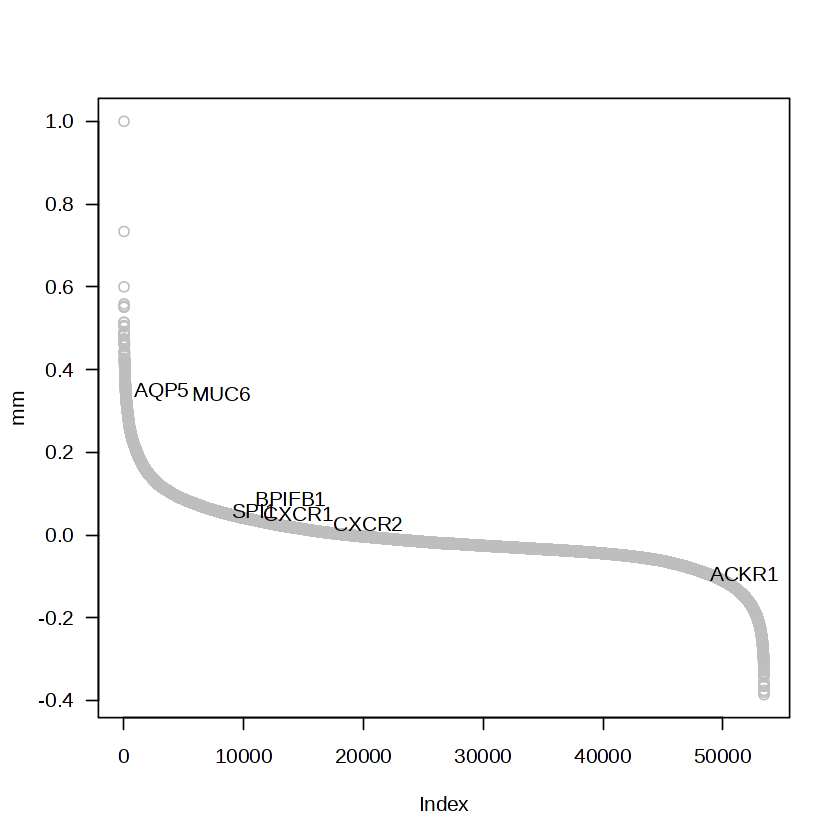

In [69]:
mm <- sort(Corr[1,],decreasing=T)
par(las=1);plot(mm, col="grey")
text(which(names(mm)=='SPI1')+3000, mm[which(names(mm)=='SPI1')], labels='SPI1')
text(which(names(mm)=='CXCR1')+6000, mm[which(names(mm)=='CXCR1')], labels='CXCR1')
text(which(names(mm)=='CXCR2')+8000, mm[which(names(mm)=='CXCR2')], labels='CXCR2')
text(which(names(mm)=='MUC6')+8000, mm[which(names(mm)=='MUC6')], labels='MUC6')
text(which(names(mm)=='BPIFB1')+9000, mm[which(names(mm)=='BPIFB1')], labels='BPIFB1')
text(which(names(mm)=='AQP5')+3000, mm[which(names(mm)=='AQP5')], labels='AQP5')
text(which(names(mm)=='ACKR1')+3000, mm[which(names(mm)=='ACKR1')], labels='ACKR1')

In [70]:
pdf("COAD_TCGA_gene_corr_nor_counts.pdf", w=7, h=7)
mm <- sort(Corr[1,],decreasing=T)
par(las=1);plot(mm, col="grey")
text(which(names(mm)=='SPI1')+3000, mm[which(names(mm)=='SPI1')], labels='SPI1')
text(which(names(mm)=='CXCR1')+4000, mm[which(names(mm)=='CXCR1')], labels='CXCR1')
text(which(names(mm)=='CXCR2')+11000, mm[which(names(mm)=='CXCR2')], labels='CXCR2')
text(which(names(mm)=='MUC6')+4000, mm[which(names(mm)=='MUC6')], labels='MUC6')
text(which(names(mm)=='BPIFB1')+15000, mm[which(names(mm)=='BPIFB1')], labels='BPIFB1')
text(which(names(mm)=='AQP5')+3000, mm[which(names(mm)=='AQP5')], labels='AQP5')
text(which(names(mm)=='ACKR1')+9000, mm[which(names(mm)=='ACKR1')], labels='ACKR1')
dev.off()

png 
  2

In [26]:
mat <- read.csv('./COAD_TCGA_gene_corr_nor_counts_new_sc_ref.csv')
mat %>% head

,corr_with_genes
,<dbl>
TSPAN6,-0.295918079
TNMD,-0.154309803
DPM1,-0.258419521
SCYL3,-0.008909479
C1orf112,-0.083783625
FGR,0.064749880


In [27]:
mat <- as.data.frame(mat)
mat$highlight <- rep('no', nrow(mat))
gene_list <- c('MUC6','MUC5AC','BPIFB1','AQP5','ACKR1','PROK2','CXCR1','CXCR2','FCGR3B')
mat[gene_list, 'highlight'] <- 'yes'
mat <- mat %>% drop_na()
mat %>% head

,corr_with_genes,highlight
,<dbl>,<chr>
TSPAN6,-0.295918079,no
TNMD,-0.154309803,no
DPM1,-0.258419521,no
SCYL3,-0.008909479,no
C1orf112,-0.083783625,no
FGR,0.064749880,no


In [28]:
mat <- mat[order(mat[,1], decreasing=T), ]
mat$x <- 1:nrow(mat)
mat$gene <- rownames(mat)
mat %>% head

,corr_with_genes,highlight,x,gene
,<dbl>,<chr>,<int>,<chr>
MUC5B,0.7327933,no,1,MUC5B
PGC,0.6376174,no,2,PGC
ADGRG6,0.5733809,no,3,ADGRG6
LCN2,0.5667702,no,4,LCN2
AGR2,0.5586994,no,5,AGR2
AC108451.2,0.5569082,no,6,AC108451.2


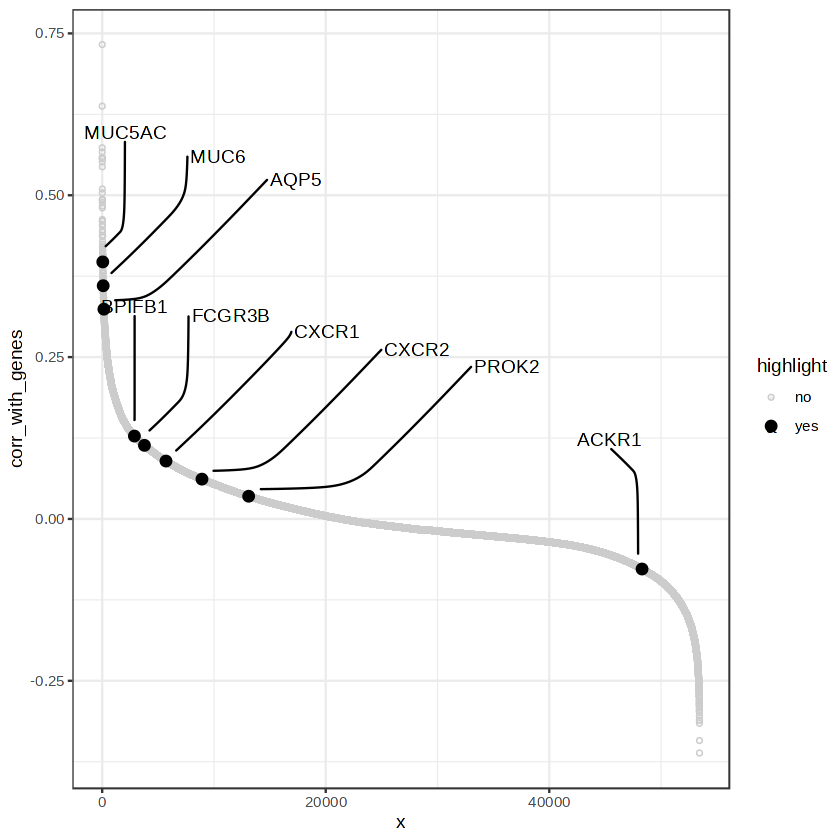

In [29]:
library(tidyverse)
library(ggrepel)
library(ggfun)
library(grid)

ggplot(mat %>% arrange(highlight),
       aes(x = x, y = corr_with_genes, color = highlight, 
           size = highlight, shape = highlight)) +
       geom_point() + 
       scale_color_manual(values = c(no = 'grey80', yes = 'black')) + 
       scale_size_manual(values = c(no = 1, yes = 4)) + 
       scale_shape_manual(values = c(no = 1, yes = 20)) + 
geom_text_repel(data =  mat %>% filter(highlight == 'yes'),
                aes(x = x, y = corr_with_genes, label = gene),
                box.padding = 0.5,
                nudge_x = 0.2,
                nudge_y = 0.2,
                segment.curvature = -0.1,
                segment.ncp = 3,
                segment.angle = 10,
                direction = "x", 
                hjust = "right",
                force = 5,
                point.padding = 1
                  ) +        
theme_bw()
ggsave("figures/COAD_TCGA_gene_corr_nor_counts_new_sc_ref.pdf", width = 6.5, height = 6)